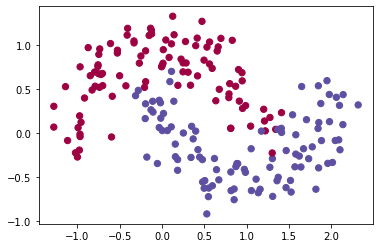

In [10]:
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets


noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
# plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
#accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)

In [11]:
X.shape

(2, 200)

In [12]:
Y.shape

(1, 200)

In [13]:
def layer_size(X,Y,n_h):
    n_x= X.shape[0]
    n_h= n_h
    n_y= Y.shape[0]
    
    return n_x,n_h,n_y
n_x,n_h,n_y=layer_size(X,Y,4)

In [14]:
import numpy as np
def initialize_parameter(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x) *0.01
    b1 = np.zeros((n_h,1))
    w2=  np.random.randn(n_y,n_h) *0.01
    b2=  np.zeros((n_y,1))
    
    parameters={'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    
    assert (w1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (w2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    return parameters

parameters=initialize_parameter(n_x,n_h,n_y)

In [15]:
def forward_propogation(X,parameters):
    w1= parameters['w1']
    b1= parameters['b1']
    w2= parameters['w2']
    b2= parameters['b2']
    
    
        
    z1= np.dot(w1,X) + b1
    a1= np.tanh(z1)
    
    z2= np.dot(w2,a1) + b2
    
    a2= sigmoid(z2)
    cache= {'z1':z1,'a1':a1,'a2':a2,'z2':z2}
    
    return a2,cache


    
a2,cache=forward_propogation(X,parameters)
print(a2.shape)
print(cache.keys())

(1, 200)
dict_keys(['z1', 'a1', 'a2', 'z2'])


In [16]:
def compute_cost(a2,Y,parameters): # a2(1,200) * Y(1*200)
    m= Y.shape[1]
    cost= -(1/m) *np.sum(Y.dot(np.log(a2).T) + (1-Y).dot(np.log(1-a2).T))
    return cost

compute_cost(a2,Y,parameters)

0.6931587512792439

In [17]:
def backward_propogation(parameters,cache,X,Y):## X (2, 200)
    m= Y.shape[1]
    w1= parameters['w1']#(4, 2)
    w2= parameters['w2'] #(1, 4)

    
    a1= cache['a1'] #(4, 200)
    a2= cache['a2']

    
    dz2= a2 -Y                  #(1, 200)
    da2= np.tanh(dz2)
    
    dw2= (1/m) * np.dot(dz2, a1.T) #(1, 4)
    db2= (1/m) * np.sum(dz2,axis=1, keepdims=True)
    
    dz1= (np.dot(w2.T,dz2) * (1 - a1**2)) * (1/m)#(4, 200)
    dw1= np.dot(dz1,X.T) * (1/m)#(4, 2)
    db1= (1/m) * (np.sum(dz1,axis=1,keepdims=True))

    grads={'dw1':dw1,'dw2':dw2,'db1':db1,'db2':db2}
    return grads
grads=backward_propogation(parameters,cache,X,Y)

In [18]:
def update_parameter(parameters,grads,alpha):
    w1= parameters['w1']#(4, 2)
    b1= parameters['b1']
    w2= parameters['w2'] #(1, 4)
    b2= parameters['b2']
    
    dw1= grads['dw1']
    dw2= grads['dw2']
    db1= grads['db1']
    db2= grads['db2']
    
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2 
    
    parameters={'w1':w1,'w2':w2,'b1':b1,'b2':b2}
    return parameters
    
update_parameter(parameters,grads,0.09)

{'w1': array([[ 0.00934827, -0.0068031 ],
        [ 0.0098422 , -0.01059882],
        [ 0.01404102,  0.00252523],
        [-0.00945002, -0.00261905]]),
 'w2': array([[-0.00569509, -0.00303368, -0.00164514, -0.0171906 ]]),
 'b1': array([[9.35590608e-11],
        [5.23228960e-11],
        [4.94842707e-11],
        [2.43528279e-10]]),
 'b2': array([[-1.11562305e-06]])}

In [24]:
def nn_model(X,Y,n_h, num_iterations = 10000):
    
    n_x,n_h,n_y= layer_size(X,Y,n_h)
    parameters= initialize_parameter(n_x,n_h,n_y)
    
    a2,cache= forward_propogation(X,parameters)
    cost= compute_cost(a2,Y,parameters)
    
    grads= backward_propogation(parameters,cache,X,Y)
    li=[]
    for i in range(num_iterations):
        a2,cache= forward_propogation(X,parameters)
        cost= compute_cost(a2,Y,parameters)
        grads= backward_propogation(parameters,cache,X,Y)
        parameters= update_parameter(parameters,grads,1.2)
        
        
        if i%1000==0:
            li.append(cost)
#             print(f'{i} cost:',cost)
    return parameters

parameters=nn_model(X,Y,4)


In [20]:
parameters

{'w1': array([[-0.07391447,  0.26878645],
        [ 0.06625603, -0.21461311],
        [ 0.07600484, -0.30274428],
        [ 0.04203423, -0.09583265]]),
 'w2': array([[-5.02435209,  3.61175217,  6.48861231,  1.51375377]]),
 'b1': array([[-0.0172933 ],
        [ 0.00827399],
        [ 0.03170483],
        [ 0.00159639]]),
 'b2': array([[0.1364935]])}

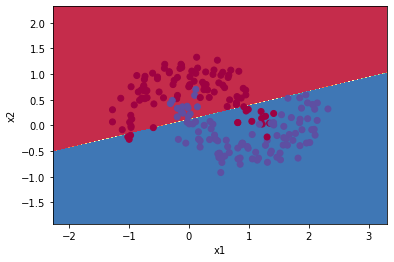

In [21]:
def predict(X,parameters):
    a2,cache= forward_propogation(X,parameters)
    predictions= a2 > 0.5
    
    return predictions
plot_decision_boundary(lambda x: predict(x.T,parameters), X, Y)

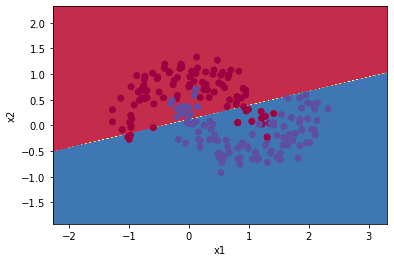

In [27]:
for i,n_h in enumerate([1,2,4,6,8,12,16]):
    parameters=  nn_model(X,Y,n_h, num_iterations = 10000)
    plot_decision_boundary(lambda x: predict(x.T,parameters), X, Y)